# Testy


In [2]:
from collections import Counter
import math

from IPython.display import Image
import numpy as np
from numpy.linalg import inv
import scipy.linalg as la
import scipy.stats as st

In [3]:
from fractions import Fraction
# pozor může být nepřesné
def vystup_zlomky(matrix):
    for i in range(matrix.shape[0]):
        row = ""
        for j in range(matrix.shape[1]):
            row += str(Fraction(matrix[i, j]).limit_denominator())
            row += "\t"
        print(row)

## Jaký test zvolit

- Jednovýběrový
    - Jeden set dat.
    - Porovnává se pouze střední hodnota nebo rozptyl
    - Např. točí hospoda podmírák?
- Dvouvýběrový
    - Dva sety dat ($X$ o délce $|X| = n$ a $Y$ o délce $|Y| = m$).
    - Např. točení piva v dvou hospodách.
- Párový
    - Dva sety dat a data spolu souvisí ($X, Y$ kde délka $|X| = |Y|$).
    - Např. body před a po kurzu.
- Kontingenční tabulka
    - Testování nezávislosti.
    - Zadané tabulkou.
    - Např. ne/spokojenost call centra. 
- Test dobré shody
    - Testování nezávislosti.
    - Biny.
    - Neřeší pořadí (např. hodů hlava/orel).
    - Např. pochází data z rovnoměrného rozdělení?
- Bloky
    - Testování nezávislosti.
    - Řeší pořadí (např. hodů hlava/orel).

## Kritický obor

Pokud platí podmínka **kritického oboru**, pak **zamítáme $H_0$** ve prospěch $H_A$. Pokud neplatí, pak **nezamítáme $H_0$**.

## Basic vzorečky

### Výběrový průměr

$$\overline{X}_n = \dfrac{1}{n}\sum_{i=1}^nX_i$$

## Výběrový rozptyl

$$s_n^2 = s_X^2 = \dfrac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$

## Výběrová směrodatná odchylka

$$s_n = \sqrt{s_n^2}$$



In [10]:
def vyberovy_prumer(x):
    #Xn = sum(x) / len(x)
    return np.mean(x)

def vyberovy_rozptyl(x):
    #sn2 = sum( (x-np.mean(x))**2 / (len(x) - 1) )
    return np.var(x, ddof = 1)

def vyberova_smerodatna_odchylka(x):
    #sn = np.sqrt(sn2)
    return np.std(x, ddof = 1)

In [11]:
_data = np.array([-1.5,0.5,0.5,1.5,-1.5,0.5,-2.5,-1.5])

print("Výběrový průměr", vyberovy_prumer(_data))
print("Výběrový rozptyl", vyberovy_rozptyl(_data))
print("Výbšrová směrodatná odchylka", vyberova_smerodatna_odchylka(_data))


Výběrový průměr -0.5
Výběrový rozptyl 2.0
Výbšrová směrodatná odchylka 1.4142135623730951


# Jednovýběrový t-test

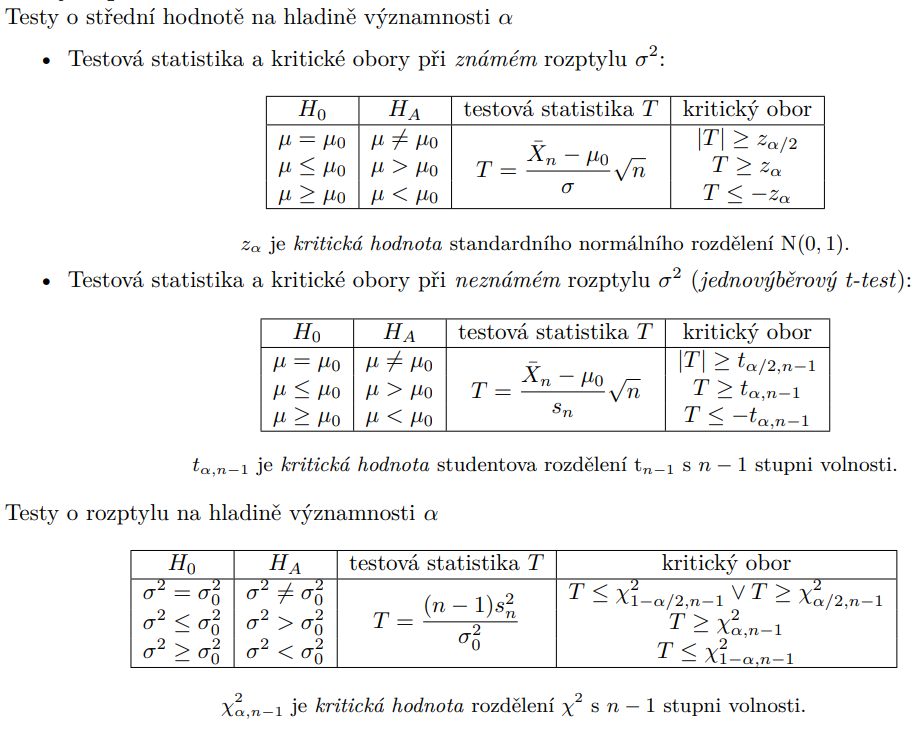

In [12]:
Image(filename='imgs/jednovyberovy_ttest.png') 

### Známý rozptyl

$z_\alpha$ můžeme aproximovat hodnotou $t_\alpha$ v $+\infty$. (pokud koukáte do tabulek)

In [13]:
# DATA

# TODO: NASTAVIT
#x = np.array([0.510, 0.462, 0.451, 0.466, 0.491, 0.503, 0.475, 0.487, 0.512, 0.505])
x = np.array([0] * 15 + [1] * 10)
mu0 = 0.5
alpha = 0.05

# vypočítaná data
n = len(x)
Xn = sum(x)/n # np.mean(x)
ro2 = 1/4
ro = np.sqrt(ro2) # np.std(x, ddof = 1)
print('Xn = ', Xn, ", ro^2 = ", ro2, ", ro = ", ro, ", n = ", n , sep = "")

Xn = 0.4, ro^2 = 0.25, ro = 0.5, n = 25


#### a) $H_0: \mu = 0.5$ vs. $H_A: \mu \neq 0.5$

In [14]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha/2) # tabulky
print("T = ", T, ", z = ", z)
print("|T| >= z : ", np.abs(T) >= z, "=>", "Zamítám" if np.abs(T) >= z else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999998 , z =  1.9599639845400545
|T| >= z :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.32728688127978545)
alpha > p :  False => Nezamítám


#### b) $H_0: \mu \geq 0.5$ vs. $H_A: \mu < 0.5$

In [15]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha) # tabulky
print("T = ", T, ", z = ", z)
print("T <= -z : ", T <= -z, "=>", "Zamítám" if T <= -z else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999998 , z =  1.6448536269514729
T <= -z :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.16364344063989272)
alpha > p :  False => Nezamítám


#### c) $H_0: \mu \leq 0.5$ vs. $H_A: \mu \gt 0.5$

In [16]:
# RUČNĚ

T = (Xn - mu0)/ro*np.sqrt(n)
z = st.norm.isf(alpha) # tabulky
print("T = ", T, ", z = ", z)
print("T >= z : ", T >= z, "=>", "Zamítám" if T >= z else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'greater')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999998 , z =  1.6448536269514729
T >= z :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.8363565593601072)
alpha > p :  False => Nezamítám


### Neznámý rozptyl


In [18]:
# DATA

# TODO: NASTAVIT
#x = np.array([0.510, 0.462, 0.451, 0.466, 0.491, 0.503, 0.475, 0.487, 0.512, 0.505])
x = np.array([0] * 15 + [1] * 10)
mu0 = 0.5
alpha = 0.05

# vypočítaná data
n = len(x)
Xn = sum(x)/n # np.mean(x)
sn2 = sum((x-Xn)**2/(n-1)) # np.var(x, ddof = 1)
sn = np.sqrt(sn2) # np.std(x, ddof = 1)
print('Xn = ', Xn, ", sn^2 = ", sn2, ", sn = ", sn, ", n = ", n , sep = "")

Xn = 0.4, sn^2 = 0.2500000000000001, sn = 0.5000000000000001, n = 25


#### a) $H_0: \mu = 0.5$ vs. $H_A: \mu \neq 0.5$

In [19]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha/2, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("|T| >= t : ", np.abs(T) >= t, "=>", "Zamítám" if np.abs(T) >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999996 , t =  2.063898561628021
|T| >= t :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.32728688127978545)
alpha > p :  False => Nezamítám


#### b) $H_0: \mu \geq 0.5$ vs. $H_A: \mu < 0.5$

In [20]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
p = st.t.cdf(T,n-1)
print("T = ", T, ", t = ", t)
print("T <= -t : ", T <= -t, "=>", "Zamítám" if T <= -t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999996 , t =  1.7108820799094282
T <= -t :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.16364344063989272)
alpha > p :  False => Nezamítám


#### c) $H_0: \mu \leq 0.5$ vs. $H_A: \mu \gt 0.5$

In [21]:
# RUČNĚ

T = (Xn - mu0)/sn*np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("T >= t : ", T >= t, "=>", "Zamítám" if T >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_1samp(x, mu0, alternative = 'greater')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.9999999999999996 , t =  1.7108820799094282
T >= t :  False => Nezamítám
Ttest_1sampResult(statistic=-0.9999999999999998, pvalue=0.8363565593601072)
alpha > p :  False => Nezamítám


# Dvouvýběrový t-test

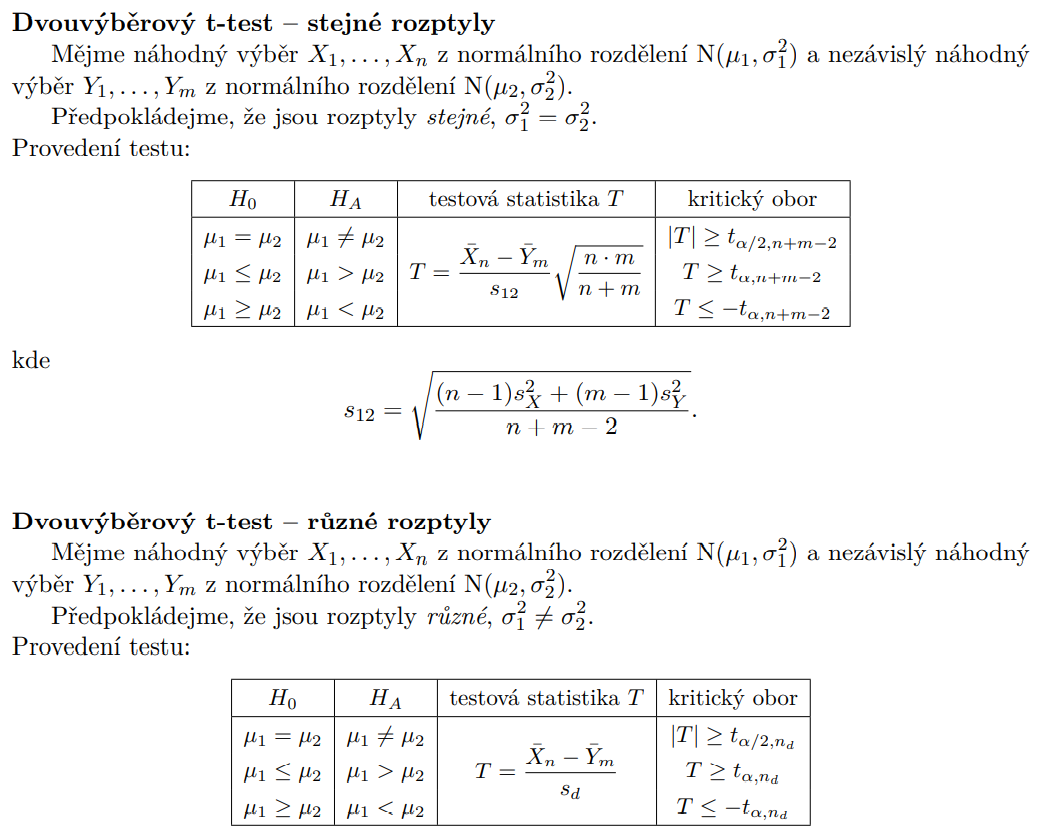

In [23]:
Image(filename='imgs/dvouvyberovy_ttest.png') 

In [24]:
# DATA

# TODO: NASTAVIT
x = np.array([0.510, 0.462, 0.451, 0.466])
y = np.array([0.491, 0.503, 0.475, 0.487, 0.512, 0.505])
alpha = 0.05

# vypočítaná data
n = len(x)
m = len(y)
Xn = np.mean(x)
Ym = np.mean(y)
sX2 = np.var(x, ddof=1)
sY2 = np.var(y, ddof=1)
sX = np.std(x, ddof=1)
sY = np.std(y, ddof=1)
print('Xn = ', Xn, ", sX = ", sX, ", n = ", n , sep = "")
print('Ym = ', Ym, ", sY = ", sY, ", m = ", m , sep = "")

Xn = 0.47225, sX = 0.025953484030729536, n = 4
Ym = 0.4955, sY = 0.013649175799292803, m = 6


### Různé rozptyly - není důvod předpokládat, že by byly stejné

#### a) $H_0: \mu_X = \mu_Y$ vs. $H_A: \mu_X \neq \mu_Y$

In [25]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha/2,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("|T| >= t : ", np.abs(T) >= t, "=>", "Zamítám" if np.abs(T) >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'two-sided', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.6463056677044081, t = 2.7437819586464958, nd = 4.124187724040256
|T| >= t :  False => Nezamítám
Ttest_indResult(statistic=-1.6463056677044081, pvalue=0.1728976222515877)
alpha > p :  False => Nezamítám


#### b) $H_0: \mu_X \geq \mu_Y$ vs. $H_A: \mu_X < \mu_Y$

In [26]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("T <= -t : ", T <= -t, "=>", "Zamítám" if T <= -t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'less', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.6463056677044081, t = 2.1135354832035356, nd = 4.124187724040256
T <= -t :  False => Nezamítám
Ttest_indResult(statistic=-1.6463056677044081, pvalue=0.08644881112579385)
alpha > p :  False => Nezamítám


#### c) $H_0: \mu_X \leq \mu_Y$ vs. $H_A: \mu_X \gt \mu_Y$

In [28]:
# RUČNĚ

sd2 = sX2/n + sY2/m
nd = sd2**2/((sX2/n)**2/(n-1) + (sY2/m)**2/(m-1))
T = (Xn - Ym)/np.sqrt(sd2)
t = st.t.isf(alpha,nd) # tabulky
print("T = ", T, ", t = ", t , ", nd = ", nd, sep="")
print("T >= t : ", T >= t, "=>", "Zamítám" if T >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'greater', equal_var = False)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.6463056677044081, t = 2.1135354832035356, nd = 4.124187724040256
T >= t :  False => Nezamítám
Ttest_indResult(statistic=-1.6463056677044081, pvalue=0.9135511888742062)
alpha > p :  False => Nezamítám


### Shodné rozptyly - je důvod předpokládat shodu, nebo si to otestuji


a) $H_0: \mu_X = \mu_Y$ vs. $H_A: \mu_X \neq \mu_Y$

In [29]:
# RUČNĚ

s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha/2,n + m - 2) # tabulky
p = 2 * st.t.sf(np.abs(T), n + m - 2)
print("T = ", T, ", t = ", t,", s12 = ", s12, sep="")
print("|T| >= t : ", np.abs(T) >= t, "=>", "Zamítám" if np.abs(T) >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'two-sided', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.8749815817538935, t = 2.306004135033371, s12 = 0.019210186100087633
|T| >= t :  False => Nezamítám
Ttest_indResult(statistic=-1.8749815817538935, pvalue=0.09765627533486607)
alpha > p :  False => Nezamítám


#### b) $H_0: \mu_X \geq \mu_Y$ vs. $H_A: \mu_X < \mu_Y$

In [30]:
# RUČNĚ
s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha,n+m-2) # tabulky
print("T = ", T, ", t = ", t , ", s12 = ", s12, sep="")
print("T <= -t : ", T <= -t, "=>", "Zamítám" if T <= -t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'less', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.8749815817538935, t = 1.8595480375228428, s12 = 0.019210186100087633
T <= -t :  True => Zamítám
Ttest_indResult(statistic=-1.8749815817538935, pvalue=0.04882813766743303)
alpha > p :  True => Zamítám


#### c) $H_0: \mu_X \leq \mu_Y$ vs. $H_A: \mu_X \gt \mu_Y$

In [32]:
# RUČNĚ
s12 = np.sqrt(((n-1)*sX2 + (m-1)*sY2)/(n+m-2))
T = (Xn - Ym)/s12*np.sqrt(n*m/(n+m))
t = st.t.isf(alpha,n+m-2) # tabulky
print("T = ", T, ", t = ", t , ", s12 = ", s12, sep="")
print("T >= t : ", T >= t, "=>", "Zamítám" if T >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

_res = st.ttest_ind(x, y, alternative = 'greater', equal_var = True)
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T = -1.8749815817538935, t = 1.8595480375228428, s12 = 0.019210186100087633
T >= t :  False => Nezamítám
Ttest_indResult(statistic=-1.8749815817538935, pvalue=0.9511718623325669)
alpha > p :  False => Nezamítám


# Párový t-test


Pokud chci $\ge$, používám $p = st.t.cdf(T,n-1)$.

Pokud chci $\le$, používám $p = st.t.cdf(np.abs(T),n-1)$.

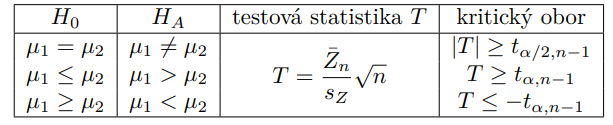

In [33]:
Image(filename='imgs/parovy_ttest.png') 

In [34]:
# DATA

# TODO: NASTAVIT
x = np.array([0.82, 1.08, 1.01, 0.63, 1.45, 1.12, 0.56, 0.83, 1.16, 1.38])
y = np.array([0.94, 0.79, 0.75, 0.74, 1.25, 0.79, 0.76, 0.75, 0.78, 0.78])
z = x - y
#z = np.array([1.5, -0.5, -0.5, -1.5, +1.5, -0.5, +2.5, 1.5])
alpha = 0.05

# vypočítaná data
n = len(z)
Zn = sum(z)/n # np.mean(x)
sz2 = np.var(z, ddof = 1)
sz = np.std(z, ddof = 1)
print('Zn = ', Zn, ", sz^2 = ", sz2, ", sz = ", sz, ", n = ", n, sep = "")

Zn = 0.17099999999999999, sz^2 = 0.06505444444444443, sz = 0.25505772767051077, n = 10


#### a) $H_0: \mu_x = \mu_y$ vs. $H_A: \mu_x \neq \mu_y$

In [36]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha/2, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("|T| >= t : ", np.abs(T) >= t, "=>", "Zamítám" if np.abs(T) >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, PŘI ZADANÉM X A Y
_res = st.ttest_rel(x, y, alternative = 'two-sided')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  2.1201062395856716 , t =  2.262157162740992
|T| >= t :  False => Nezamítám
Ttest_relResult(statistic=2.1201062395856716, pvalue=0.06302670601433798)
alpha > p :  False => Nezamítám


#### b) $H_0: \mu_x \ge \mu_y$ vs. $H_A: \mu_x \lt \mu_y$

In [37]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("T <= -t : ", T <= -t, "=>", "Zamítám" if T <= -t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, JEN PŘI ZADANÉM X A Y
_res = st.ttest_rel(x, y, alternative = 'less')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  2.1201062395856716 , t =  1.8331129326536337
T <= -t :  False => Nezamítám
Ttest_relResult(statistic=2.1201062395856716, pvalue=0.968486646992831)
alpha > p :  False => Nezamítám


#### c) $H_0: \mu_x \le \mu_y$ vs. $H_A: \mu_x \gt \mu_y$

In [39]:
# RUČNĚ

T = Zn/sz * np.sqrt(n)
t = st.t.isf(alpha, n-1) # tabulky
print("T = ", T, ", t = ", t)
print("T >= t : ", T >= t, "=>", "Zamítám" if T >= t else "Nezamítám")

# POMOCÍ FUNKCE TTEST

# TODO: POZOR, JEN PŘI ZADANÉM X A Y
_res = st.ttest_rel(x, y, alternative = 'greater')
print(_res)
p = _res[1]
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  2.1201062395856716 , t =  1.8331129326536337
T >= t :  True => Zamítám
Ttest_relResult(statistic=2.1201062395856716, pvalue=0.03151335300716899)
alpha > p :  True => Zamítám


# Kontingenční tabulka

Aby fungovala asymptotika, je doporučeno, aby $\forall i, j : n\hat{p}_{i\bullet}\hat{p}_{\bullet j} \ge 5$.

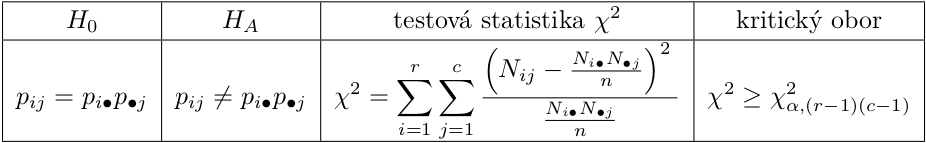

In [40]:
Image(filename='imgs/kontingencni_tabulka.png') 

In [41]:
# DATA

# TODO: nastavit
# skutečné četnosti
# x\y
Nij = np.matrix([
    [1, 11, 7, 21],
    [0, 8, 23, 29]
])
alpha = 0.05

# vypočítaná data
n = np.sum(Nij)
print("n =", n)
print("Nij =")
print(Nij)
print("Hezky:")
vystup_zlomky(Nij)

n = 100
Nij =
[[ 1 11  7 21]
 [ 0  8 23 29]]
Hezky:
1	11	7	21	
0	8	23	29	


In [44]:
# RUČNĚ

# odhady marginál
p_i = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print("pi_ =\n", p_i)
print("p_j =\n", p_j)

# teoretické četnosti
pipj = np.matmul(p_i,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

# nutné sloučit 1. a 2. sloupec
cc12 = np.sum(Nij[:,:2], axis = 1)
cc34 = Nij[:,2:]
Nij = np.append(cc12, cc34, axis = 1)
n = np.sum(Nij)
print("Nij =\n", Nij)
print("n =", n)

print("Po sloučení")

# odhady marginál
pi_ = np.sum(Nij, axis = 1)/n
p_j = np.sum(Nij, axis = 0)/n
print("pi_ =\n", pi_)
print("p_j =\n", p_j)
# teoretické četnosti
pipj = np.matmul(pi_,p_j)
print("pipj =\n",pipj)
npipj = n * pipj
print("npipj =\n",npipj)

# testová statistika
Chi2 = np.sum(np.square(Nij - npipj)/npipj)
print("Chi2 =", Chi2)
# kritická hodnota
df = (np.size(Nij,axis =0) - 1)*(np.size(Nij,axis =1) - 1)
print("df =",df)
chi2 = st.chi2.isf(alpha,df)
print("chi2 =", chi2)

# p-hodnota
p = st.chi2.sf(np.abs(Chi2),df) # = 1-st.chi2.cdf(Chi2,df)
print("p =", p)

print("...")
print("Chi2 >= chi2 : ", Chi2 >= chi2, "=>", "Zamítám" if Chi2 >= chi2 else "Nezamítám")
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

pi_ =
 [[0.4]
 [0.6]]
p_j =
 [[0.2 0.3 0.5]]
pipj =
 [[0.08 0.12 0.2 ]
 [0.12 0.18 0.3 ]]
npipj =
 [[ 8. 12. 20.]
 [12. 18. 30.]]
Nij =
 [[19 21]
 [31 29]]
n = 100
Po sloučení
pi_ =
 [[0.4]
 [0.6]]
p_j =
 [[0.5 0.5]]
pipj =
 [[0.2 0.2]
 [0.3 0.3]]
npipj =
 [[20. 20.]
 [30. 30.]]
Chi2 = 0.16666666666666666
df = 1
chi2 = 3.8414588206941285
p = 0.6830913983096086
...
Chi2 >= chi2 :  False => Nezamítám
alpha > p :  False => Nezamítám


In [43]:
# POMOCÍ FUNKCE

Chi2, p, df, _ = st.chi2_contingency(Nij, correction = False)
print("Chi2 =", Chi2)
print("df =", df)
print("p =", p)
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

Chi2 = 6.888888888888889
df = 2
p = 0.031922491834895705
alpha > p :  True => Zamítám


# Test dobré shody

Je třeba pamatovat na to, že test $\chi^2$ je asymptotický a proto ho lze použít jen pro dostatečně velký rozsah výběru $n$. Obvykle se uvádí, že musí platit $n \cdot p_i \ge 5$ pro každé $i$.

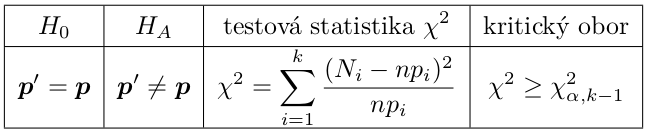

In [45]:
Image(filename='imgs/test_dobre_shody.png')

In [46]:
# DATA

# TODO: nastavit
x = np.array([0.055 , 0.068 , 0.102 , 0.105 , 0.118 , 0.160 , 0.178 , 0.203 , 0.260 , 0.274, 0.289 , 0.291 , 0.346 , 0.358 , 0.366 , 0.472 , 0.588 , 0.617 , 0.721 , 0.932])
#x = np.array([0] * 15 + [1] * 10)
k = 4 # počet binů
alpha = 0.05

# vypočítaná data
n = len(x)
# četnosti
Ni, edges = np.histogram(x, bins = k, range = (0,1), density = None)
n = np.sum(Ni)
print("Edges =" ,edges)
print("n = ", n, ", Ni = ", Ni, sep="")

Edges = [0.   0.25 0.5  0.75 1.  ]
n = 20, Ni = [8 8 3 1]


In [47]:
# RUČNĚ

# teoretické četnosti
pi = np.ones(k) * 1/k
npi = n * pi
print("pi =", pi)
print("npi =", npi)

# testová statistika
Chi2 = sum((Ni - npi)**2/npi)
print("Chi2 =", Chi2)

# kritická hodnota
df = k-1
chi2 = st.chi2.isf(alpha,df) # tabulky
print("chi2 =", chi2)

# p-hodnota
p = st.chi2.sf(Chi2,df) # = 1-st.chi2.cdf(Chi2,df)
print("p =", p)

print("...")
print("Chi2 >= chi2 : ", Chi2 >= chi2, "=>", "Zamítám" if Chi2 >= chi2 else "Nezamítám")
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

pi = [0.25 0.25 0.25 0.25]
npi = [5. 5. 5. 5.]
Chi2 = 7.6000000000000005
chi2 = 7.814727903251178
p = 0.05504393637887805
...
Chi2 >= chi2 :  False => Nezamítám
alpha > p :  False => Nezamítám


In [48]:
# pomocí funkce
_res = st.chisquare(Ni,npi)
print(_res)
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

Power_divergenceResult(statistic=7.6000000000000005, pvalue=0.05504393637887805)
alpha > p :  False => Nezamítám


# Bloky

$z_\alpha$ můžeme aproximovat hodnotou $t_\alpha$ v $+\infty$.

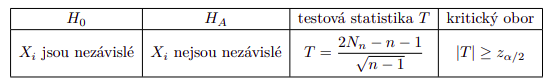

In [49]:
Image(filename='imgs/bloky_dle_stredni_hodnoty.png')

In [50]:
# DATA

# TODO: NASTAVIT
Nn = 10
n = 20
alpha = 0.1

# vypočítaná data
T = (2*Nn - n - 1)/math.sqrt(n-1)
z = st.norm.isf(alpha/2) # tabulky
p = 2 * st.norm.sf(np.abs(T))
print("T = ", T, ", z = ", z)
print("p = ", p)

print("...")
print("|T| >= z : ", np.abs(T) >= z, "=>", "Zamítám" if np.abs(T) >= z else "Nezamítám")
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  -0.22941573387056174 , z =  1.6448536269514729
p =  0.8185458083820434
...
|T| >= z :  False => Nezamítám
alpha > p :  False => Nezamítám


## Bloky nahoru/dolů

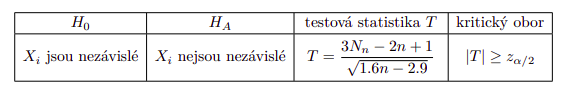

In [52]:
Image(filename='imgs/bloky_dle_monotonie.png')

In [53]:
# DATA

# TODO: NASTAVIT
Nn = 20
n = 30
alpha = 0.1

# vypočítaná data
T = (3*Nn - 2*n + 1)/math.sqrt(1.69*n-2.9)
z = st.norm.isf(alpha/2) # tabulky
p = 2 * st.norm.sf(np.abs(T))
print("T = ", T, ", z = ", z)
print("p = ", p)

print("...")
print("|T| >= z : ", np.abs(T) >= z, "=>", "Zamítám" if np.abs(T) >= z else "Nezamítám")
print("alpha > p : ", alpha > p, "=>", "Zamítám" if alpha > p else "Nezamítám")

T =  0.14463921353509293 , z =  1.6448536269514729
p =  0.8849957348451949
...
|T| >= z :  False => Nezamítám
alpha > p :  False => Nezamítám


### Kritická hodnota normálního rozdělení


In [54]:
alfa = 0.1
z = st.norm.isf(alfa/2) # pozor pro z_alfa/2
print("Kritická hodnota normálního rozdělení v bodě alfa/2 =", alfa/2, "=", z)

Kritická hodnota normálního rozdělení v bodě alfa/2 = 0.05 = 1.6448536269514729


### Zjištění p-hodnoty

In [55]:
T = 1.64485 # statistika co ti vyšla
p = st.norm.sf(np.abs(T))
print("Pro testovou statistiku T =", T, "je p-hodnota", p*2) # pozor pro Z_alpha/2

Pro testovou statistiku T = 1.64485 je p-hodnota 0.1000007481381571
